In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

In [2]:
dt=pd.read_excel("Libro1.xlsx")

In [5]:
dt.head()#ac=acomulados

,temporada,partidos,goles,golesac,partidosac
0,2009,28,26,26,28
1,2010,32,40,66,60
2,2011,37,46,112,97
3,2012,30,34,146,127
4,2013,30,31,177,157


In [41]:
dt.describe() #datos estadisticos

,temporada,partidos,goles,golesac,partidosac
count,9.000000,9.000000,9.000000,9.000000,9.000000
mean,2013.000000,31.555556,34.555556,178.666667,158.888889
std,2.738613,3.643869,8.603940,99.433395,88.679824
min,2009.000000,27.000000,25.000000,26.000000,28.000000
25%,2011.000000,29.000000,26.000000,112.000000,97.000000
50%,2013.000000,30.000000,34.000000,177.000000,157.000000
75%,2015.000000,35.000000,40.000000,260.000000,228.000000
max,2017.000000,37.000000,48.000000,311.000000,284.000000


In [54]:
dt.info() #informacion del data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temporada   9 non-null      int64  
 1   partidos    9 non-null      int64  
 2   goles       9 non-null      int64  
 3   golesac     9 non-null      int64  
 4   partidosac  9 non-null      int64  
 5   prediccion  9 non-null      float64
dtypes: float64(1), int64(5)
memory usage: 560.0 bytes


<AxesSubplot:xlabel='partidosac', ylabel='golesac'>

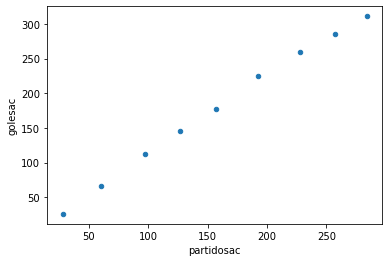

In [44]:
dt.plot.scatter(x="partidosac", y="golesac") #dispersion de datos en los valores partidosac y golesac

In [46]:
reg = LinearRegression()
reg.fit(dt[["partidosac"]], dt["golesac"])
#regression lineal

LinearRegression()

In [47]:
 reg.predict([[200],[100]]) #prediccion

D:\agl\Nueva carpeta\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([224.69557907, 112.73335971])

In [49]:
pred = pd.Series(reg.predict(dt[["partidosac"]]))
pred 

0     32.120562
1     67.948472
2    109.374493
3    142.963159
4    176.551825
5    215.738602
6    256.045000
7    288.514044
8    318.743843
dtype: float64

In [50]:
dt["prediccion"] = pred #se agrega la predicción al data
dt 


,temporada,partidos,goles,golesac,partidosac,prediccion
0,2009,28,26,26,28,32.120562
1,2010,32,40,66,60,67.948472
2,2011,37,46,112,97,109.374493
3,2012,30,34,146,127,142.963159
4,2013,30,31,177,157,176.551825
5,2014,35,48,225,192,215.738602
6,2015,36,35,260,228,256.045000
7,2016,29,25,285,257,288.514044
8,2017,27,26,311,284,318.743843


<AxesSubplot:xlabel='partidosac', ylabel='golesac'>

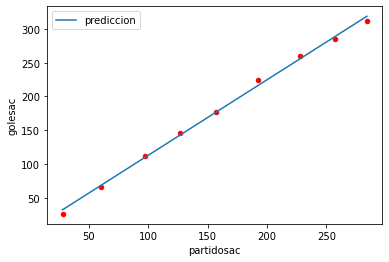

In [51]:
ax = dt.plot.line(x="partidosac", y="prediccion")
dt.plot.scatter(x="partidosac", y="golesac", ax= ax, color="red")
#grafico prediccion lineal

In [53]:
lm = smf.ols(formula="partidosac~golesac", data= dt).fit()
lm.summary() 
#Validación del modelo con coeficiente de determinación o r cuadrado

D:\agl\Nueva carpeta\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             partidosac   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     2387.
Date:                Fri, 07 Oct 2022   Prob (F-statistic):           3.94e-10
Time:                        18:31:30   Log-Likelihood:                -26.350
No. Observations:                   9   AIC:                             56.70
Df Residuals:                       7   BIC:                             57.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2221      3.678     -0.060      0.954      -8.919       8.475
golesac        0.8905      0.018     48.854      0.000       0.847       0.934
==============================================================================
Omnibus:                        0.035   Durbin-Watson:                   0.968
Prob(Omnibus):                  0.983   Jarque-Bera (JB):                0.257
Skew:                          -0.072   Prob(JB):                        0.880
Kurtosis:                       2.185   Cond. No.                         434.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""